<a href="https://colab.research.google.com/github/pray-ash911/Diabetes-prediction-using-various-models/blob/main/23056551_Prayash_Rawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 1: LIBRARY IMPORTS


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuration
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. LOADING and SAMPLING

In [ ]:
import pandas as pd

# Loading dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

print("Dataset loaded.")
print("\n--- Dataset Sample (Random 5 Rows) ---")
# Showing a sample
df.sample(5)

Dataset loaded.

--- Dataset Sample (Random 5 Rows) ---


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
38263,2.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,15.0,30.0,1.0,0.0,10.0,2.0,3.0
76598,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,20.0,30.0,1.0,0.0,7.0,3.0,3.0
68355,0.0,0.0,0.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,12.0,5.0,6.0
186974,2.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,4.0
140569,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,10.0,0.0,0.0,1.0,6.0,6.0,8.0


# 2. DATA INSPECTION


In [ ]:
# A. Checking Info (Data types and memory usage)
print("--- Dataset Information ---")
df.info()

# B. Checking Missing Values
print("\n--- Missing Values Per Column ---")
missing_values = df.isnull().sum()
print(missing_values)

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               25

# 2. Check for Duplicate Rows

In [ ]:
# 2. Check for Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"\nTotal Duplicate Rows Found: {duplicate_count}")

duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows.")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed successfully.")


Total Duplicate Rows Found: 23899
Found 23899 duplicate rows.
Duplicates removed successfully.


# 3. FILLING MISSING VALUES


In [ ]:
# If there were missing values, we use the median to fill them
# (Median is safer than Mean for medical data with outliers)
if df.isnull().values.any():
    print("Missing values found! Filling with median...")
    df.fillna(df.median(), inplace=True)
    print(" Missing values filled.")
else:
    print(" No missing values to fill. Dataset is already robust.")

# Dropping duplicates to ensure unique data for training
if df.duplicated().any():
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

 No missing values to fill. Dataset is already robust.


# 4. CHECKING IMBALANCE (1 and 2)


--- Imbalance Check 1 (Raw Counts) ---
Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

--- Imbalance Check 2 (Percentage Distribution) ---
Diabetes_012
0.0    82.711364
2.0    15.274109
1.0     2.014527
Name: proportion, dtype: float64


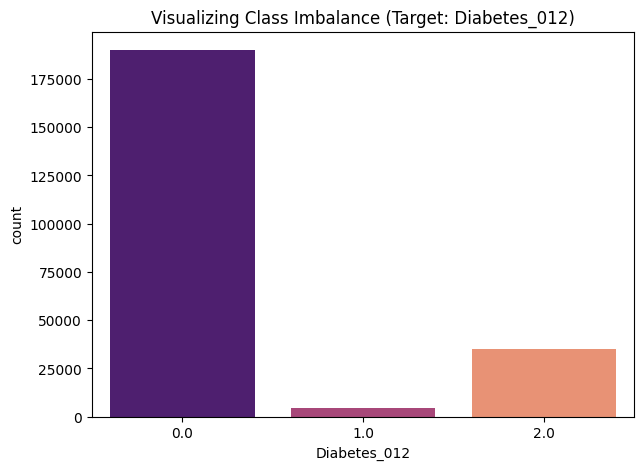

In [ ]:
# Imbalance Check 1: Raw Value Counts
print("--- Imbalance Check 1 (Raw Counts) ---")
print(df['Diabetes_012'].value_counts())

# Imbalance Check 2: Percentage Distribution
print("\n--- Imbalance Check 2 (Percentage Distribution) ---")
print(df['Diabetes_012'].value_counts(normalize=True) * 100)

# Visualizing Imbalance for the report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(x='Diabetes_012', data=df, palette='magma')
plt.title('Visualizing Class Imbalance (Target: Diabetes_012)')
plt.show()

# SECTION 3: DATA VISUALIZATION

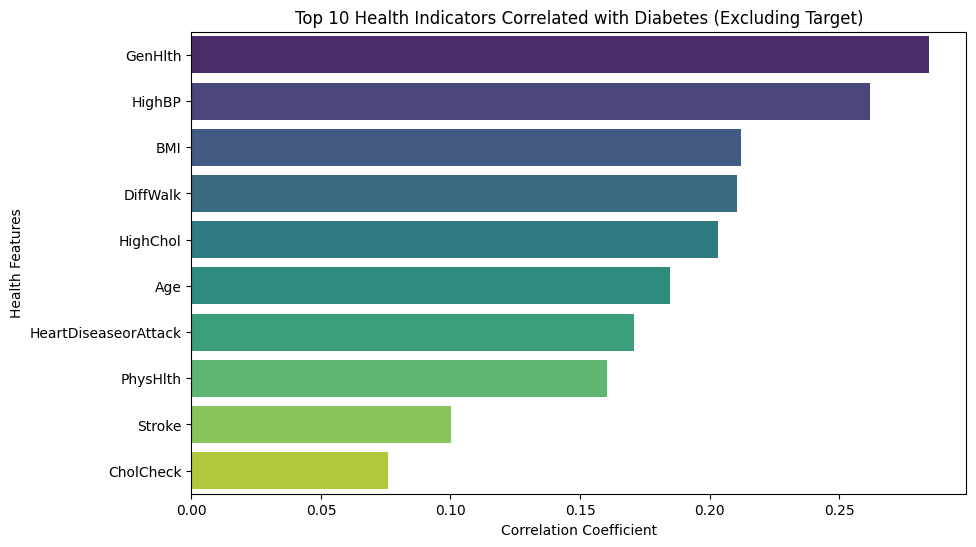

In [ ]:
plt.figure(figsize=(10, 6))

# Use .drop('Diabetes_012') so the model doesn't correlate with itself
correlation = df.corr()['Diabetes_012'].sort_values(ascending=False).drop('Diabetes_012').head(10)

sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Top 10 Health Indicators Correlated with Diabetes (Excluding Target)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Features')

plt.show()

# PRE-TRAINING VIS 1: CORRELATION BAR CHART

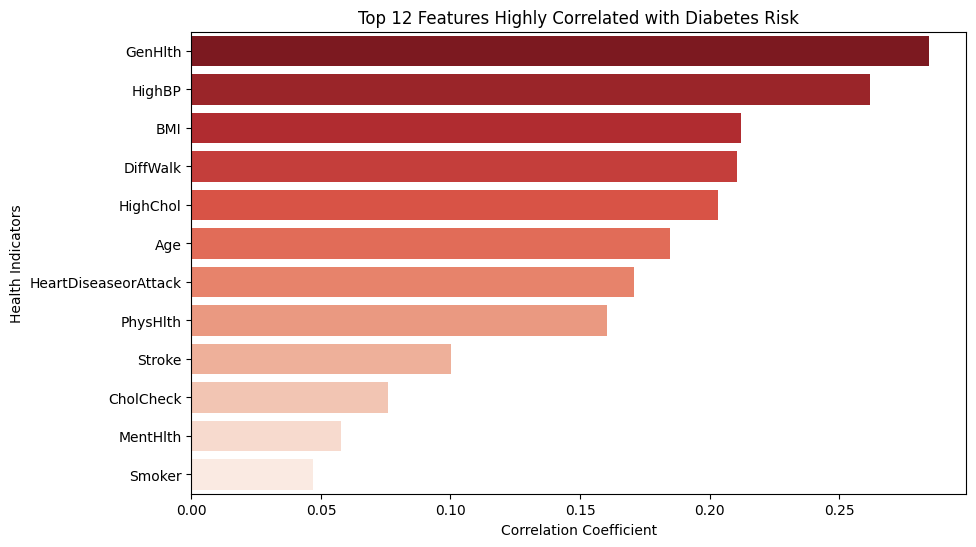

In [ ]:
plt.figure(figsize=(10, 6))
# Calculate correlation and sort it
correlations = df.corr()['Diabetes_012'].drop('Diabetes_012').sort_values(ascending=False)

# Plot top 10
sns.barplot(x=correlations.values[:12], y=correlations.index[:12], palette='Reds_r')
plt.title('Top 12 Features Highly Correlated with Diabetes Risk')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Indicators')
plt.show()

# PRE-TRAINING VIS 2: BMI DISTRIBUTION

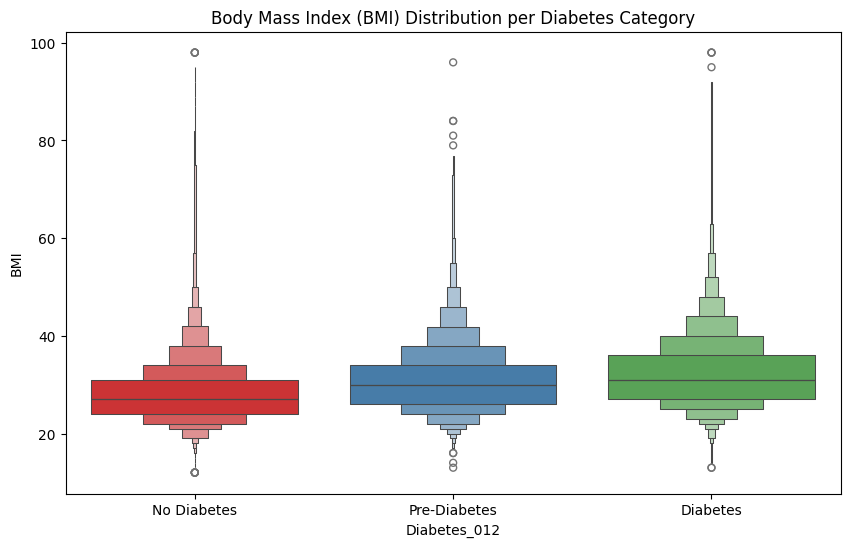

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Diabetes_012', y='BMI', data=df, palette='Set1')
plt.title('Body Mass Index (BMI) Distribution per Diabetes Category')
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.show()

# PRE-TRAINING VIS 3: MEDICAL RISK FACTORS


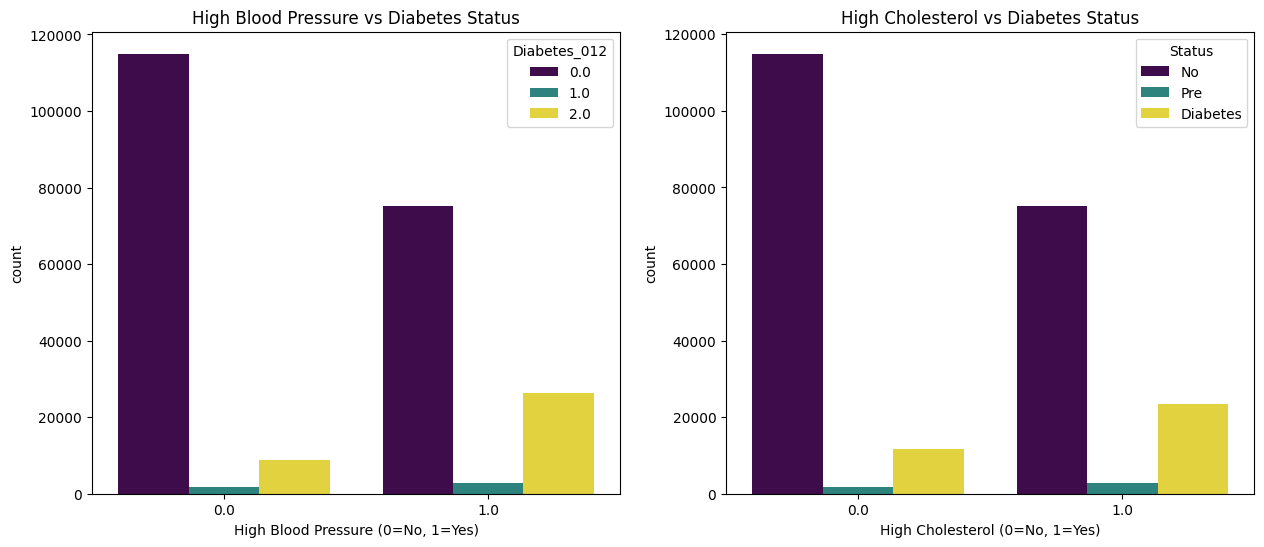

In [ ]:
# Creating a subplot for HighBP and HighChol
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# High Blood Pressure
sns.countplot(x='HighBP', hue='Diabetes_012', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('High Blood Pressure vs Diabetes Status')
ax[0].set_xlabel('High Blood Pressure (0=No, 1=Yes)')

# High Cholesterol
sns.countplot(x='HighChol', hue='Diabetes_012', data=df, ax=ax[1], palette='viridis')
ax[1].set_title('High Cholesterol vs Diabetes Status')
ax[1].set_xlabel('High Cholesterol (0=No, 1=Yes)')

plt.legend(title='Status', labels=['No', 'Pre', 'Diabetes'])
plt.show()

# PRE-TRAINING VIS 4: AGE DISTRIBUTION


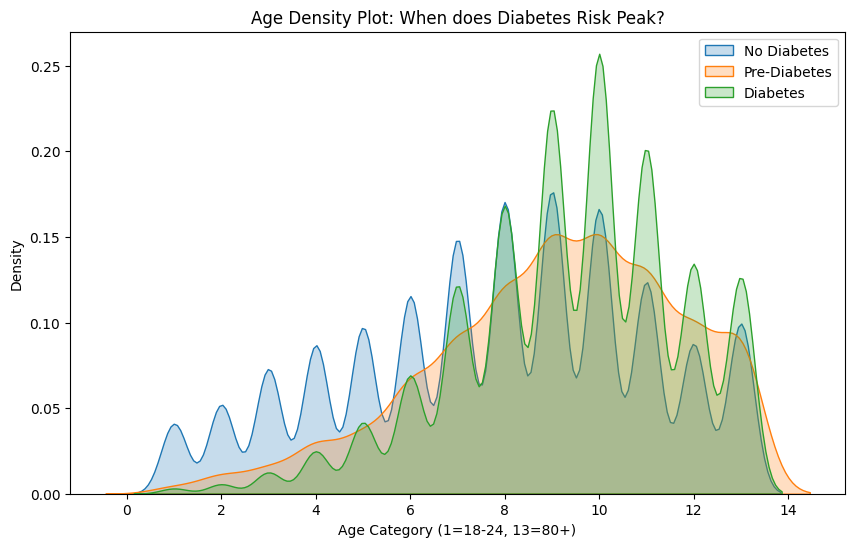

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Diabetes_012'] == 0]['Age'], label='No Diabetes', fill=True)
sns.kdeplot(data=df[df['Diabetes_012'] == 1]['Age'], label='Pre-Diabetes', fill=True)
sns.kdeplot(data=df[df['Diabetes_012'] == 2]['Age'], label='Diabetes', fill=True)

plt.title('Age Density Plot: When does Diabetes Risk Peak?')
plt.xlabel('Age Category (1=18-24, 13=80+)')
plt.legend()
plt.show()

# PRE-TRAINING VIS 5: GENHLTH HEATMAP


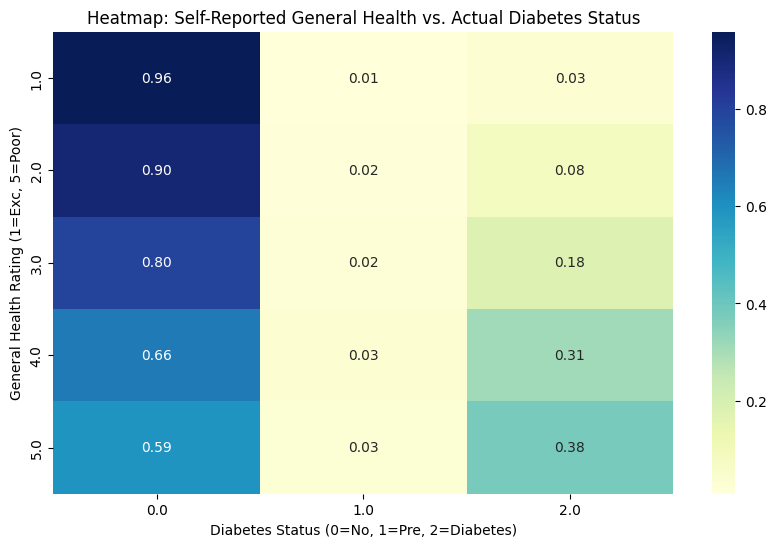

In [ ]:
plt.figure(figsize=(10, 6))
# Create a cross-tabulation of GenHlth and Diabetes
health_pivot = pd.crosstab(df['GenHlth'], df['Diabetes_012'], normalize='index')

sns.heatmap(health_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap: Self-Reported General Health vs. Actual Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Pre, 2=Diabetes)')
plt.ylabel('General Health Rating (1=Exc, 5=Poor)')
plt.show()

# SECTION 4: PREPROCESSING and FEATURE SELECTION


In [ ]:
# 1. Define X (Features) and y (Target)
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# 2. Feature Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Feature Selection using XGBoost
temp_model = XGBClassifier()
temp_model.fit(X_scaled, y)

# Pick Top 15 features based on importance
importances = pd.Series(temp_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15).index.tolist()

print(f"Selected Top Features: {top_features}")
X_final = X_scaled[top_features]

# 4. Train-Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

Selected Top Features: ['HighBP', 'GenHlth', 'HighChol', 'CholCheck', 'HvyAlcoholConsump', 'Age', 'BMI', 'HeartDiseaseorAttack', 'DiffWalk', 'Sex', 'Income', 'Stroke', 'Education', 'PhysHlth', 'NoDocbcCost']


# SECTION 5: HANDLING CLASS IMBALANCE (SMOTE)


In [ ]:
print("Original Training Set Shape:", y_train.value_counts().to_dict())

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Balanced Training Set Shape:", y_train_bal.value_counts().to_dict())

Original Training Set Shape: {0.0: 133038, 2.0: 24568, 1.0: 3240}
Balanced Training Set Shape: {0.0: 133038, 2.0: 133038, 1.0: 133038}


# SECTION 6: MODEL TRAINING AND ENSEMBLE


In [ ]:
# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# Create Hard Voting Ensemble
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgbm', lgbm)],
    voting='hard'
)

# Training
print("Training Ensemble Model")
ensemble.fit(X_train_bal, y_train_bal)
print("Training Complete!")

Training Ensemble Model
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3302
[LightGBM] [Info] Number of data points in the train set: 399114, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training Complete!


# 7.1: INDIVIDUAL MODEL - RANDOM FOREST


In [ ]:
from sklearn.tree import plot_tree

# Initialize RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print(" TRAINING AND EVALUATING: RANDOM FOREST")

# 1. Fit (Train) the individual model
rf.fit(X_train_bal, y_train_bal)

# 2. Predict and Metrics
rf_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

 TRAINING AND EVALUATING: RANDOM FOREST
Random Forest Accuracy: 0.7940

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     57017
         1.0       0.02      0.01      0.01      1389
         2.0       0.39      0.36      0.38     10529

    accuracy                           0.79     68935
   macro avg       0.43      0.42      0.42     68935
weighted avg       0.78      0.79      0.79     68935



Text(0.5, 1.0, 'RF: Confusion Matrix')

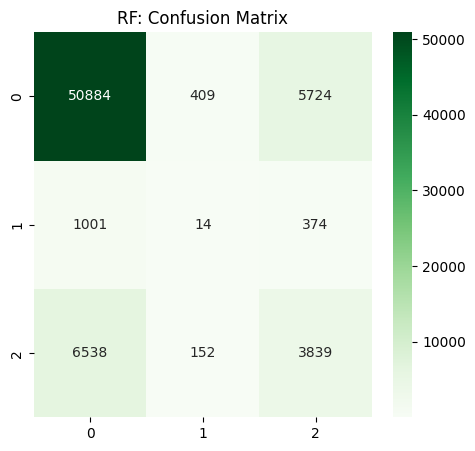

In [ ]:
# 3. Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title('RF: Confusion Matrix')

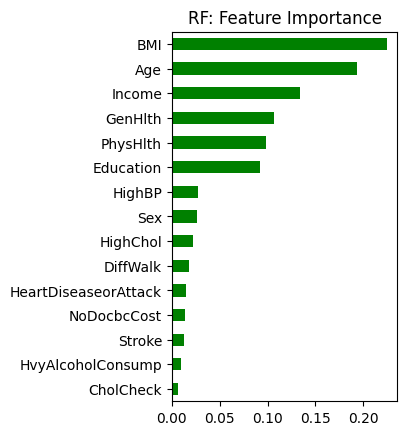

In [ ]:
# 4. Feature Importance Diagram
plt.subplot(1, 2, 2)
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', color='green')
plt.title('RF: Feature Importance')
plt.show()

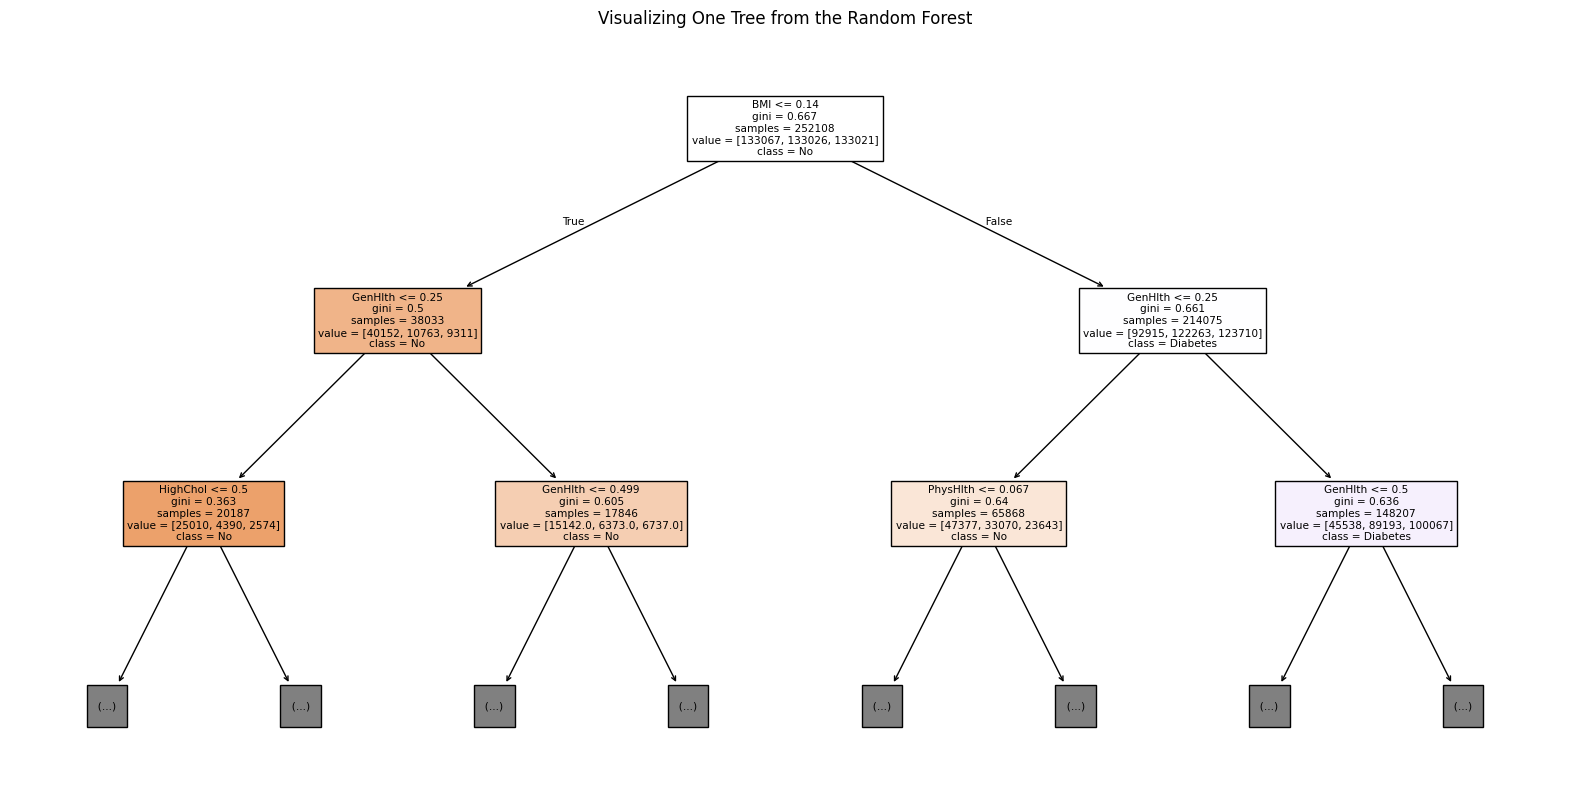

In [ ]:
# 5. Decision Tree Visualization
# We visualize the first tree (index 0) from the forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0],
          feature_names=X_train.columns,
          class_names=['No', 'Pre', 'Diabetes'],
          filled=True, max_depth=2)
plt.title("Visualizing One Tree from the Random Forest")
plt.show()

# 7.2: INDIVIDUAL MODEL - XGBOOST


In [ ]:
# Initialize XGBOOST model
xgb = XGBClassifier(n_estimators=100, random_state=42)

# 1. Fit (Train)
xgb.fit(X_train_bal, y_train_bal)

# 2. Predict
xgb_pred = xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.8314

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     57017
         1.0       0.00      0.00      0.00      1389
         2.0       0.51      0.28      0.36     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.41      0.42     68935
weighted avg       0.79      0.83      0.80     68935



Text(0.5, 1.0, 'XGBoost: Confusion Matrix')

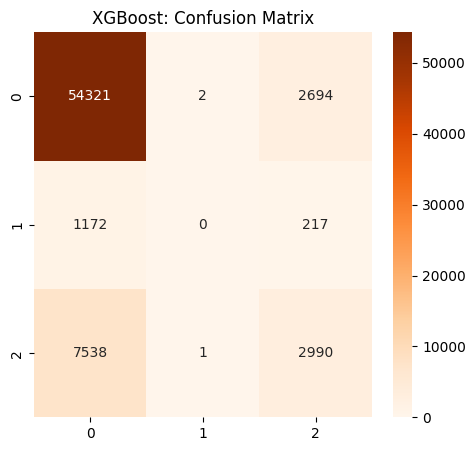

In [ ]:
# 3. Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost: Confusion Matrix')

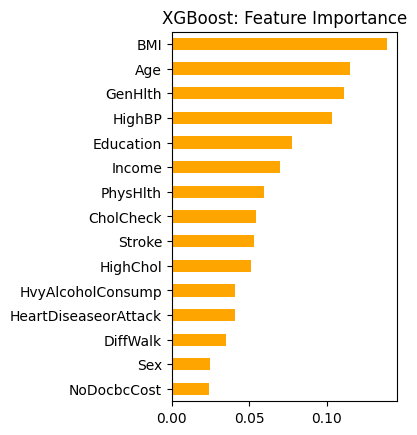

In [ ]:
plt.subplot(1, 2, 2)
pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', color='orange')
plt.title('XGBoost: Feature Importance')
plt.show()

# 7.3: INDIVIDUAL MODEL - LIGHTGBM


In [ ]:
print("TRAINING AND EVALUATING: LIGHTGBM")

#Initialize LIGHTGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# 1. Fit (Train)
lgbm.fit(X_train_bal, y_train_bal)

# 2. Predict
lgbm_pred = lgbm.predict(X_test)
print(f"LightGBM Accuracy: {accuracy_score(y_test, lgbm_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, lgbm_pred))

TRAINING AND EVALUATING: LIGHTGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.143939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3302
[LightGBM] [Info] Number of data points in the train set: 399114, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM Accuracy: 0.8328

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     57017
         1.0       0.00      0.00      0.00      1389
         2.0       0.52      0.28      0.36     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.41      0.42     68935
weighted avg       0.79      0.83      0.80     68935



Text(0.5, 1.0, 'LightGBM: Confusion Matrix')

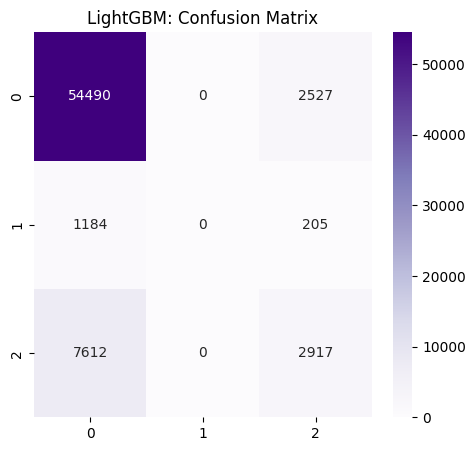

In [ ]:
# 3. Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, lgbm_pred), annot=True, fmt='d', cmap='Purples')
plt.title('LightGBM: Confusion Matrix')

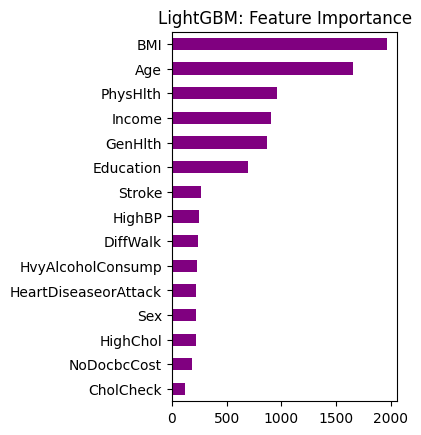

In [ ]:
# LightGBM: Feature Importance
plt.subplot(1, 2, 2)
pd.Series(lgbm.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', color='purple')
plt.title('LightGBM: Feature Importance')
plt.show()

# 7.4: GINI IMPURITY ANALYSIS


In [ ]:
# Let's extract the Gini impurity of the root node of the first 5 trees
print("--- Gini Impurity Analysis for Random Forest (Top Nodes) ---")
for i in range(5):
    gini = rf.estimators_[i].tree_.impurity[0]
    print(f"Tree {i+1} Root Node Gini Impurity: {gini:.4f}")

print("\nNote: Gini Impurity ranges from 0 (Pure) to 0.5 (Balanced/Impure) for binary splits.")

--- Gini Impurity Analysis for Random Forest (Top Nodes) ---
Tree 1 Root Node Gini Impurity: 0.6667
Tree 2 Root Node Gini Impurity: 0.6667
Tree 3 Root Node Gini Impurity: 0.6667
Tree 4 Root Node Gini Impurity: 0.6667
Tree 5 Root Node Gini Impurity: 0.6667

Note: Gini Impurity ranges from 0 (Pure) to 0.5 (Balanced/Impure) for binary splits.


# 7.4: COMPARATIVE SUMMARY TABLE


# SECTION 7: MODEL EVALUATION


In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize base models
rf_ens = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_ens = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm_ens = LGBMClassifier(n_estimators=100, random_state=42)

# Create HARD Voting Ensemble
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_ens),
        ('xgb', xgb_ens),
        ('lgbm', lgbm_ens)
    ],
    voting='hard'
)


In [ ]:
print("TRAINING HARD VOTING ENSEMBLE")
ensemble.fit(X_train_bal, y_train_bal)
print("ENSEMBLE TRAINING COMPLETE")

TRAINING HARD VOTING ENSEMBLE
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3302
[LightGBM] [Info] Number of data points in the train set: 399114, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
ENSEMBLE TRAINING COMPLETE


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
ensemble_pred = ensemble.predict(X_test)

# Accuracy and Report
print(f"Ensemble Accuracy: {accuracy_score(y_test, ensemble_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred))


Ensemble Accuracy: 0.8327

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     57017
         1.0       0.00      0.00      0.00      1389
         2.0       0.51      0.29      0.37     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.41      0.43     68935
weighted avg       0.79      0.83      0.81     68935



In [ ]:
df_results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'Hard Voting Ensemble'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, lgbm_pred),
        accuracy_score(y_test, ensemble_pred)
    ]
})

print("\n MODEL COMPARISON")
print(df_results)


 MODEL COMPARISON
                  Model  Accuracy
0         Random Forest  0.794038
1               XGBoost  0.831377
2              LightGBM  0.832770
3  Hard Voting Ensemble  0.832668


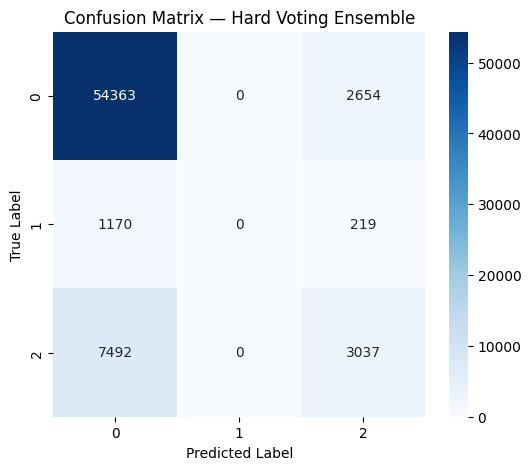

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ensemble_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Hard Voting Ensemble")
plt.show()

In [ ]:
print("FITTING ENSEMBLE BASE MODELS")

rf_ens.fit(X_train_bal, y_train_bal)
xgb_ens.fit(X_train_bal, y_train_bal)
lgbm_ens.fit(X_train_bal, y_train_bal)

print("BASE MODELS FITTED")

FITTING ENSEMBLE BASE MODELS
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3302
[LightGBM] [Info] Number of data points in the train set: 399114, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
BASE MODELS FITTED


In [ ]:
rf_probs = rf_ens.predict_proba(X_test)
xgb_probs = xgb_ens.predict_proba(X_test)
lgbm_probs = lgbm_ens.predict_proba(X_test)

avg_probs = (rf_probs + xgb_probs + lgbm_probs) / 3


In [ ]:
# Extract feature importances
rf_imp = rf_ens.feature_importances_
xgb_imp = xgb_ens.feature_importances_
lgbm_imp = lgbm_ens.feature_importances_

# Consensus importance
avg_importance = (rf_imp + xgb_imp + lgbm_imp) / 3

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': avg_importance
}).sort_values(by='Importance', ascending=False)

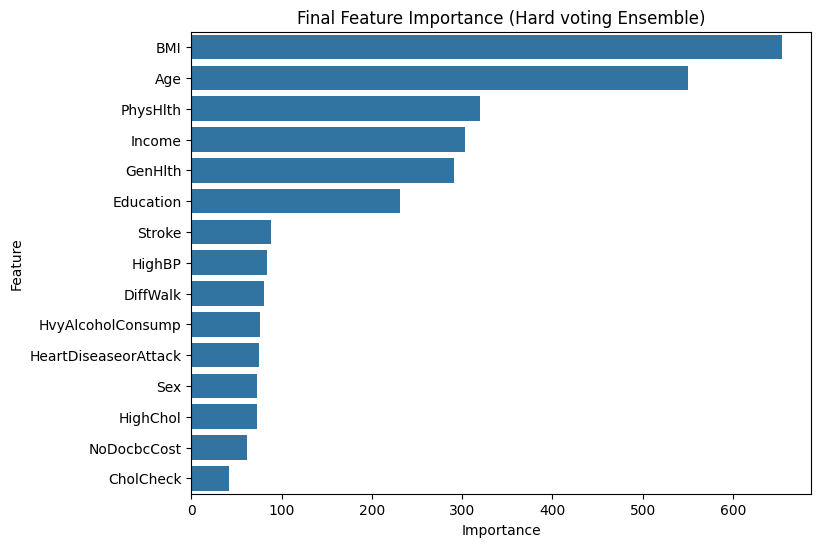

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(15)
)
plt.title("Final Feature Importance (Hard voting Ensemble)")
plt.show()